# Step 1.Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive')


In [ ]:
from data_resampling import process_data

# Example usage
data_path = '/content/drive/My Drive/eDO_data_M1.csv'
resampled_data = process_data(data_path)
resampled_data.head()

/content/drive/My Drive/data_resampling.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = data.resample('1H').agg({


,open,high,low,close,volume,future_close,pct_change,Target,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,close_lag_6,close_lag_7,close_lag_8,close_lag_9,close_lag_10,MA_3
TimeStamp,,,,,,,,,,,,,,,,,,,
2022-01-01 10:00:00,47143.98,47298.75,46715.39,46871.08,923.01760,47391.82,1.111005,C,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46811.77,46778.14,46656.13,47046.626667
2022-01-01 11:00:00,46871.09,47007.73,46756.77,46758.87,732.88793,47319.67,1.199345,C,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46811.77,46778.14,46924.643333
2022-01-01 12:00:00,46758.87,47150.48,46756.30,47074.05,582.15009,47440.74,0.778964,C,46758.87,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46811.77,46901.333333
2022-01-01 13:00:00,47074.05,47199.67,46935.09,47023.24,454.14412,47722.65,1.487371,C,47074.05,46758.87,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,46813.20,46952.053333
2022-01-01 14:00:00,47023.24,47100.00,46850.18,46926.22,503.66220,47625.30,1.489743,C,47023.24,47074.05,46758.87,46871.08,47143.98,47124.82,47194.73,46979.62,47192.55,46711.05,47007.836667


In [ ]:
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']


# Step 2: Model Selection and Training

1.   List item
2.   List item


Choose a machine learning model like Random Forest, XGBoost, or LSTM (if time-series-based deep learning is preferred). Example with

## Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Prepare input features (X) and target (y)
X = train_data.drop(['Target', 'pct_change', 'future_close'], axis=1)
y = train_data['Target']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Validation predictions
y_pred = model.predict(X_val)

# Evaluate performance
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


[[   0    0   17   20    2]
 [   0    2  287   94   13]
 [   0   30 3092  817  138]
 [   0    8  225  167   20]
 [   0    0   14    5    1]]
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        39
           B       0.05      0.01      0.01       396
           C       0.85      0.76      0.80      4077
           D       0.15      0.40      0.22       420
           E       0.01      0.05      0.01        20

    accuracy                           0.66      4952
   macro avg       0.21      0.24      0.21      4952
weighted avg       0.72      0.66      0.68      4952



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

# Define resampling methods
methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Hybrid (SMOTE + Tomek)": SMOTETomek(random_state=42),
    "Class Weight Adjustment": None  # No resampling, adjust class weights instead
}

# Iterate through resampling methods
results = {}
for method_name, sampler in methods.items():
    print(f"\n--- Evaluating Method: {method_name} ---")

    # Resample data (if applicable)
    if sampler is not None:
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_resampled, y_resampled = X_train, y_train

    # Define the model
    model = RandomForestClassifier(random_state=42, class_weight="balanced" if sampler is None else None)

    # Train the model
    model.fit(X_resampled, y_resampled)

    # Validation predictions
    y_pred = model.predict(X_val)

    # Evaluate performance
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)

    # Save results for comparison
    results[method_name] = {
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    # Display results
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(cr)

# Final comparison
print("\n--- Comparison of All Methods ---")
for method_name, metrics in results.items():
    print(f"\nMethod: {method_name}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\nClassification Report:")
    print(metrics["Classification Report"])



--- Evaluating Method: SMOTE ---
Confusion Matrix:
[[   0    5    6   24    4]
 [  18   14  139  210   15]
 [  80  160 1631 2052  154]
 [   5   17   87  273   38]
 [   0    1    9    9    1]]

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00        39
           B       0.07      0.04      0.05       396
           C       0.87      0.40      0.55      4077
           D       0.11      0.65      0.18       420
           E       0.00      0.05      0.01        20

    accuracy                           0.39      4952
   macro avg       0.21      0.23      0.16      4952
weighted avg       0.73      0.39      0.47      4952


--- Evaluating Method: ADASYN ---
Confusion Matrix:
[[   0    6    7   19    7]
 [  11   13  200  143   29]
 [  68  168 2189 1338  314]
 [   4   16  148  169   83]
 [   0    1   10    8    1]]

Classification Report:
              precision    recall  f1-score   support

           A       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Step 7: Predict and Evaluate on Test Data
Predict the target categories for the test set and evaluate the results.

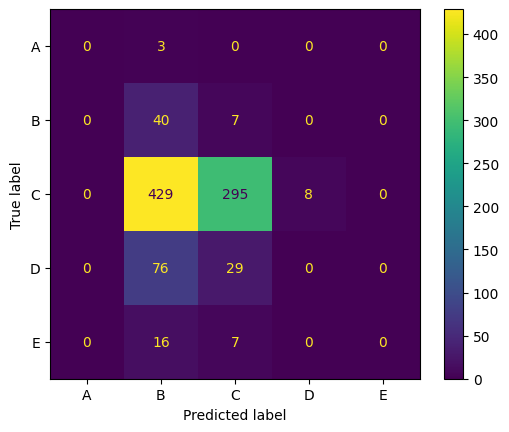

In [ ]:
X_test = test_data.drop(['Target', 'pct_change', 'future_close'], axis=1)
y_test = test_data['Target']

# Test predictions
y_test_pred = model.predict(X_test)

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)


Step 8: Save the Results
Save the predictions and their respective categories in a CSV file:

In [ ]:
Step 8: Save the Results
Save the predictions and their respective categories in a CSV file:

## RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Reshape input features for LSTM
time_steps = 10  # Number of time steps for sequence modeling

def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

print(f"Shape of X_train_seq: {X_train_seq.shape}, y_train_seq: {y_train_seq.shape}")
print(f"Shape of X_test_seq: {X_test_seq.shape}, y_test_seq: {y_test_seq.shape}")


Shape of X_train_seq: (24746, 10, 18), y_train_seq: (24746,)
Shape of X_test_seq: (900, 10, 18), y_test_seq: (900,)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Output layer with one neuron per class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=10,         # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Load the best weights after stopping
)
# Train the model
history = model.fit(X_train_seq, y_train_seq, epochs=120, batch_size=32, validation_split=0.2,  callbacks=[early_stopping])


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8159 - loss: 0.7590 - val_accuracy: 0.8232 - val_loss: 0.6544
Epoch 2/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8182 - loss: 0.6355 - val_accuracy: 0.8434 - val_loss: 0.4408
Epoch 3/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8535 - loss: 0.4288 - val_accuracy: 0.8453 - val_loss: 0.4788
Epoch 4/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8713 - loss: 0.3617 - val_accuracy: 0.8636 - val_loss: 0.3633
Epoch 5/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8818 - loss: 0.3323 - val_accuracy: 0.8721 - val_loss: 0.3836
Epoch 6/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8893 - loss: 0.3119 - val_accuracy: 0.9063 - val_loss: 0.2599
Epoch 7/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8900 - loss: 0.3026 - val_accuracy: 0.9034 - val_loss: 0.2586
Epoch 8/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.8947 - loss: 0.2846 - val_ac

In [ ]:
# Evaluate on test data
y_pred = model.predict(X_test_seq)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test_seq, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test_seq, y_pred_classes, target_names=encoder.classes_))


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Confusion Matrix:
[[  2   1   0   0   0]
 [  1  29  17   0   0]
 [  0  25 690   9   0]
 [  0   0  52  49   2]
 [  0   0   1   7  15]]

Classification Report:
              precision    recall  f1-score   support

           A       0.67      0.67      0.67         3
           B       0.53      0.62      0.57        47
           C       0.91      0.95      0.93       724
           D       0.75      0.48      0.58       103
           E       0.88      0.65      0.75        23

    accuracy                           0.87       900
   macro avg       0.75      0.67      0.70       900
weighted avg       0.87      0.87      0.87       900



### RNN with LSTM using Over Samppling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Reshape input features for LSTM
time_steps = 10  # Number of time steps for sequence modeling

def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Resampling methods to compare
methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Hybrid (SMOTE + Tomek)": SMOTETomek(random_state=42),
    "Class Weight Adjustment": None  # No resampling, adjust class weights instead
}

results = {}

for method_name, sampler in methods.items():
    print(f"\n--- Evaluating Method: {method_name} ---")

    # Resampling (if applicable)
    if sampler:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    else:
        X_resampled, y_resampled = X_train_scaled, y_train  # No resampling

    # Create sequences for LSTM
    X_train_seq, y_train_seq = create_sequences(X_resampled, y_resampled, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(50, activation='relu'),
        Dense(len(encoder.classes_), activation='softmax')  # Output layer with one neuron per class
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=30, batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate on test data
    y_pred = model.predict(X_test_seq)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix and Classification Report
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test_seq, y_pred_classes)
    print(cm)

    print("\nClassification Report:")
    report = classification_report(y_test_seq, y_pred_classes, target_names=encoder.classes_)
    print(report)

    # Save results
    results[method_name] = {
        "confusion_matrix": cm,
        "classification_report": report
    }

# Summarize results
print("\n--- Comparison of Results ---")
for method_name, result in results.items():
    print(f"\nMethod: {method_name}")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\nClassification Report:")
    print(result["classification_report"])



--- Evaluating Method: SMOTE ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8482 - loss: 0.4282 - val_accuracy: 0.0157 - val_loss: 8.2917
Epoch 2/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9456 - loss: 0.1688 - val_accuracy: 0.0166 - val_loss: 8.5353
Epoch 3/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.9585 - loss: 0.1211 - val_accuracy: 0.0513 - val_loss: 9.1737
Epoch 4/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9619 - loss: 0.1067 - val_accuracy: 0.0529 - val_loss: 10.1514
Epoch 5/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9642 - loss: 0.0982 - val_accuracy: 0.0278 - val_loss: 13.4227
Epoch 6/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.9661 - loss: 0.0934 - val_accuracy: 0.0661 - val_loss: 13.3783
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Confusion Matrix:
[[  0   2   1   0   0]
 [  0   3  44   0   0]
 [  0   0 720   4   0]
 [  0   0 101   2   0]
 [  0   0  23   0   0]]

Classification Report:
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.7710 - loss: 0.6139 - val_accuracy: 0.0174 - val_loss: 4.2701
Epoch 2/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9073 - loss: 0.3045 - val_accuracy: 0.0164 - val_loss: 5.7141
Epoch 3/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9343 - loss: 0.2070 - val_accuracy: 0.1277 - val_loss: 2.0074
Epoch 4/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 78s 15ms/step - accuracy: 0.9478 - loss: 0.1636 - val_accuracy: 0.1151 - val_loss: 2.1270
Epoch 5/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9523 - loss: 0.1500 - val_accuracy: 0.0974 - val_loss: 2.5280
Epoch 6/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9543 - loss: 0.1400 - val_accuracy: 0.4006 - val_loss: 1.0656
Epoch 7/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9554 - loss: 0.1333 - val_accuracy: 0.0489 - val_loss: 3.7370
Epoch 8/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9579 -

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 44s 16ms/step - accuracy: 0.8351 - loss: 0.4557 - val_accuracy: 0.0157 - val_loss: 6.6660
Epoch 2/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - accuracy: 0.9450 - loss: 0.1773 - val_accuracy: 0.0766 - val_loss: 7.7605
Epoch 3/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9560 - loss: 0.1301 - val_accuracy: 0.0180 - val_loss: 11.9028
Epoch 4/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9605 - loss: 0.1106 - val_accuracy: 0.0880 - val_loss: 10.5086
Epoch 5/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9617 - loss: 0.1077 - val_accuracy: 0.0282 - val_loss: 14.7467
Epoch 6/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9634 - loss: 0.0989 - val_accuracy: 0.0411 - val_loss: 15.0710
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Confusion Matrix:
[[  0   0   3   0   0]
 [  0   0  47   0   0]
 [  0   0 724   0   0]
 [  0   0 103   0   0]
 [  0   0  23   0   0]]

Classification Report:
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8168 - loss: 0.7426 - val_accuracy: 0.8232 - val_loss: 0.6440
Epoch 2/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8242 - loss: 0.6672 - val_accuracy: 0.8341 - val_loss: 0.4900
Epoch 3/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8504 - loss: 0.4535 - val_accuracy: 0.8582 - val_loss: 0.4239
Epoch 4/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8699 - loss: 0.3638 - val_accuracy: 0.8689 - val_loss: 0.3895
Epoch 5/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8850 - loss: 0.3272 - val_accuracy: 0.8913 - val_loss: 0.2934
Epoch 6/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8892 - loss: 0.3102 - val_accuracy: 0.8879 - val_loss: 0.3046
Epoch 7/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8890 - loss: 0.3051 - val_accuracy: 0.9020 - val_loss: 0.2708
Epoch 8/30
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8933 - loss: 0.2933 - val

### RNN with LSTM using under samling methods

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import (
    NearMiss,
    InstanceHardnessThreshold,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Reshape input features for LSTM
time_steps = 10  # Number of time steps for sequence modeling

def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Undersampling methods to compare
methods = {
    "NearMiss": NearMiss(),
    "Instance Hardness Threshold": InstanceHardnessThreshold(random_state=42),
    "Condensed Nearest Neighbour": CondensedNearestNeighbour(random_state=42),
    "Tomek Links": TomekLinks(),
    "One Sided Selection": OneSidedSelection(random_state=42),
    "Edited Nearest Neighbours": EditedNearestNeighbours(),
    "Repeated Edited Nearest Neighbours": RepeatedEditedNearestNeighbours(),
    "AllKNN": AllKNN(),
    "Neighbourhood Cleaning Rule": NeighbourhoodCleaningRule()
}

results = {}

for method_name, sampler in methods.items():
    print(f"\n--- Evaluating Method: {method_name} ---")

    # Resampling (if applicable)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error with method {method_name}: {e}")
        continue

    # Create sequences for LSTM
    X_train_seq, y_train_seq = create_sequences(X_resampled, y_resampled, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(50, activation='relu'),
        Dense(len(encoder.classes_), activation='softmax')  # Output layer with one neuron per class
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=300, batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate on test data
    y_pred = model.predict(X_test_seq)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix and Classification Report
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test_seq, y_pred_classes)
    print(cm)

    print("\nClassification Report:")
    report = classification_report(y_test_seq, y_pred_classes, target_names=encoder.classes_)
    print(report)

    # Save results
    results[method_name] = {
        "confusion_matrix": cm,
        "classification_report": report
    }

# Summarize results
print("\n--- Comparison of Results ---")
for method_name, result in results.items():
    print(f"\nMethod: {method_name}")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\nClassification Report:")
    print(result["classification_report"])



--- Evaluating Method: NearMiss ---
Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.2662 - loss: 1.5010 - val_accuracy: 0.0000e+00 - val_loss: 4.4519
Epoch 2/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3953 - loss: 1.2282 - val_accuracy: 0.0000e+00 - val_loss: 5.9174
Epoch 3/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7905 - loss: 0.6656 - val_accuracy: 0.0000e+00 - val_loss: 7.9384
Epoch 4/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9443 - loss: 0.2509 - val_accuracy: 0.0000e+00 - val_loss: 8.1184
Epoch 5/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9271 - loss: 0.2295 - val_accuracy: 0.0000e+00 - val_loss: 7.5823
Epoch 6/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9380 - loss: 0.1999 - val_accuracy: 0.0000e+00 - val_loss: 7.2778
Epoch 7/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9687 - loss: 0.1214 - val_accuracy: 0.0000e+00 - val_loss: 6.6912
Epoch 8/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9770 - loss: 0.1108 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


405/405 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9438 - loss: 0.3785 - val_accuracy: 0.7988 - val_loss: 2.1151
Epoch 2/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9723 - loss: 0.0885 - val_accuracy: 0.7988 - val_loss: 3.6878
Epoch 3/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9936 - loss: 0.0231 - val_accuracy: 0.7988 - val_loss: 4.1227
Epoch 4/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9959 - loss: 0.0163 - val_accuracy: 0.7988 - val_loss: 4.2250
Epoch 5/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9956 - loss: 0.0176 - val_accuracy: 0.7988 - val_loss: 4.2173
Epoch 6/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9979 - loss: 0.0085 - val_accuracy: 0.7988 - val_loss: 4.3018
Epoch 7/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.7988 - val_loss: 4.5137
Epoch 8/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5897 - loss: 1.4854 - val_accuracy: 0.0000e+00 - val_loss: 2.2247
Epoch 2/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8211 - loss: 0.8300 - val_accuracy: 0.0000e+00 - val_loss: 4.2248
Epoch 3/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8302 - loss: 0.5166 - val_accuracy: 0.0000e+00 - val_loss: 4.1724
Epoch 4/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8271 - loss: 0.4866 - val_accuracy: 0.0000e+00 - val_loss: 4.5754
Epoch 5/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8384 - loss: 0.4567 - val_accuracy: 0.0000e+00 - val_loss: 4.9585
Epoch 6/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8347 - loss: 0.4553 - val_accuracy: 0.0000e+00 - val_loss: 4.8594
Epoch 7/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7898 - loss: 0.5249 - val_accuracy: 0.0000e+00 - val_loss: 5.0025
Epoch 8/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8248 - los

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


613/613 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8166 - loss: 0.7337 - val_accuracy: 0.8277 - val_loss: 0.6369
Epoch 2/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8286 - loss: 0.6329 - val_accuracy: 0.8553 - val_loss: 0.4326
Epoch 3/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8551 - loss: 0.4282 - val_accuracy: 0.8808 - val_loss: 0.3222
Epoch 4/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8747 - loss: 0.3622 - val_accuracy: 0.8839 - val_loss: 0.2902
Epoch 5/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8860 - loss: 0.3277 - val_accuracy: 0.8924 - val_loss: 0.2779
Epoch 6/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8901 - loss: 0.3131 - val_accuracy: 0.9102 - val_loss: 0.2574
Epoch 7/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8938 - loss: 0.2955 - val_accuracy: 0.8322 - val_loss: 0.4057
Epoch 8/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8947 - loss: 0.2903 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


555/555 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8746 - loss: 0.5194 - val_accuracy: 0.4136 - val_loss: 6.4063
Epoch 2/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9795 - loss: 0.0555 - val_accuracy: 0.6184 - val_loss: 6.9454
Epoch 3/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9914 - loss: 0.0265 - val_accuracy: 0.6184 - val_loss: 7.0206
Epoch 4/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9910 - loss: 0.0312 - val_accuracy: 0.6173 - val_loss: 7.2445
Epoch 5/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9847 - loss: 0.0572 - val_accuracy: 0.6184 - val_loss: 6.4503
Epoch 6/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9961 - loss: 0.0145 - val_accuracy: 0.5373 - val_loss: 7.1458
Epoch 7/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9947 - loss: 0.0166 - val_accuracy: 0.6175 - val_loss: 7.2076
Epoch 8/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9944 - loss: 0.0161 - val_a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


580/580 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8921 - loss: 0.4517 - val_accuracy: 0.6185 - val_loss: 5.8810
Epoch 2/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9897 - loss: 0.0369 - val_accuracy: 0.6185 - val_loss: 5.9577
Epoch 3/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9936 - loss: 0.0196 - val_accuracy: 0.6185 - val_loss: 5.8552
Epoch 4/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9968 - loss: 0.0113 - val_accuracy: 0.6185 - val_loss: 5.8883
Epoch 5/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9934 - loss: 0.0190 - val_accuracy: 0.6185 - val_loss: 5.7358
Epoch 6/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.6185 - val_loss: 6.2833
Epoch 7/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9962 - loss: 0.0114 - val_accuracy: 0.6185 - val_loss: 6.4330
Epoch 8/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9950 - loss: 0.0130 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


580/580 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9036 - loss: 0.4228 - val_accuracy: 0.6185 - val_loss: 6.4061
Epoch 2/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9874 - loss: 0.0429 - val_accuracy: 0.6185 - val_loss: 6.5274
Epoch 3/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9935 - loss: 0.0237 - val_accuracy: 0.6185 - val_loss: 6.6603
Epoch 4/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9948 - loss: 0.0208 - val_accuracy: 0.6185 - val_loss: 6.5904
Epoch 5/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9949 - loss: 0.0199 - val_accuracy: 0.6185 - val_loss: 6.0435
Epoch 6/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.6185 - val_loss: 6.0596
Epoch 7/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9910 - loss: 0.0280 - val_accuracy: 0.6185 - val_loss: 6.6434
Epoch 8/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9954 - loss: 0.0209 - val_ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


604/604 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9116 - loss: 0.4096 - val_accuracy: 0.5700 - val_loss: 7.5073
Epoch 2/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9795 - loss: 0.0815 - val_accuracy: 0.5700 - val_loss: 5.2666
Epoch 3/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.9882 - loss: 0.0420 - val_accuracy: 0.5696 - val_loss: 6.3108
Epoch 4/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9927 - loss: 0.0270 - val_accuracy: 0.5638 - val_loss: 6.6723
Epoch 5/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.5489 - val_loss: 7.0972
Epoch 6/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9937 - loss: 0.0180 - val_accuracy: 0.4561 - val_loss: 7.3101
Epoch 7/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9941 - loss: 0.0163 - val_accuracy: 0.5700 - val_loss: 8.0792
Epoch 8/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9961 - loss: 0.0114 - val_accu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


604/604 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8131 - loss: 0.7756 - val_accuracy: 0.8380 - val_loss: 0.6066
Epoch 2/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8384 - loss: 0.6335 - val_accuracy: 0.8380 - val_loss: 0.6041
Epoch 3/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8364 - loss: 0.6103 - val_accuracy: 0.8506 - val_loss: 0.4435
Epoch 4/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8596 - loss: 0.4076 - val_accuracy: 0.8957 - val_loss: 0.2816
Epoch 5/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8890 - loss: 0.3136 - val_accuracy: 0.9067 - val_loss: 0.2461
Epoch 6/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8960 - loss: 0.2974 - val_accuracy: 0.9203 - val_loss: 0.2429
Epoch 7/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8984 - loss: 0.2783 - val_accuracy: 0.9170 - val_loss: 0.2381
Epoch 8/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8990 - loss: 0.2783 - val_accur

## CNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Reshape input features for CNN
time_steps = 10  # Number of time steps for sequence modeling

def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

# Reshape input for CNN (add channel dimension)
X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

# Build the CNN model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(len(encoder.classes_), activation='softmax')  # Output layer with one neuron per class
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=120, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on test data
y_pred = model.predict(X_test_seq)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
cm = confusion_matrix(y_test_seq, y_pred_classes)
print(cm)

print("\nClassification Report:")
report = classification_report(y_test_seq, y_pred_classes, target_names=encoder.classes_)
print(report)


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


619/619 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8196 - loss: 0.7738 - val_accuracy: 0.8232 - val_loss: 0.6327
Epoch 2/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8189 - loss: 0.6799 - val_accuracy: 0.8232 - val_loss: 0.6654
Epoch 3/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8263 - loss: 0.5822 - val_accuracy: 0.8311 - val_loss: 0.4677
Epoch 4/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8425 - loss: 0.4683 - val_accuracy: 0.8327 - val_loss: 0.4911
Epoch 5/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8485 - loss: 0.4375 - val_accuracy: 0.8467 - val_loss: 0.4000
Epoch 6/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8531 - loss: 0.4179 - val_accuracy: 0.8358 - val_loss: 0.5591
Epoch 7/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8539 - loss: 0.4068 - val_accuracy: 0.8489 - val_loss: 0.3790
Epoch 8/120
619/619 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8604 - loss: 0.3872 - val_accuracy: 0

### CCN with over sampling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Reshape input features for CNN
time_steps = 10  # Number of time steps for sequence modeling

def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Oversampling methods to compare
methods = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "Hybrid (SMOTE + Tomek)": SMOTETomek(random_state=42),
    "Class Weight Adjustment": None  # No resampling, adjust class weights instead
}

results = {}

for method_name, sampler in methods.items():
    print(f"\n--- Evaluating Method: {method_name} ---")

    # Resampling
    X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

    # Create sequences for CNN
    X_train_seq, y_train_seq = create_sequences(X_resampled, y_resampled, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

    # Reshape input for CNN (add channel dimension)
    X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
    X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

    # Build the CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(len(encoder.classes_), activation='softmax')  # Output layer with one neuron per class
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=30, batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate on test data
    y_pred = model.predict(X_test_seq)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix and Classification Report
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test_seq, y_pred_classes)
    print(cm)

    print("\nClassification Report:")
    report = classification_report(y_test_seq, y_pred_classes, target_names=encoder.classes_)
    print(report)

    # Save results
    results[method_name] = {
        "confusion_matrix": cm,
        "classification_report": report
    }

# Summarize results
print("\n--- Comparison of Results ---")
for method_name, result in results.items():
    print(f"\nMethod: {method_name}")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\nClassification Report:")
    print(result["classification_report"])



--- Evaluating Method: SMOTE ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8316 - loss: 0.4614 - val_accuracy: 0.0157 - val_loss: 11.2377
Epoch 2/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9495 - loss: 0.1540 - val_accuracy: 0.0157 - val_loss: 16.7148
Epoch 3/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9547 - loss: 0.1370 - val_accuracy: 0.0308 - val_loss: 10.3473
Epoch 4/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9564 - loss: 0.1275 - val_accuracy: 0.0164 - val_loss: 15.1003
Epoch 5/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9555 - loss: 0.1275 - val_accuracy: 0.0285 - val_loss: 13.1891
Epoch 6/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9559 - loss: 0.1264 - val_accuracy: 0.0182 - val_loss: 17.1762
Epoch 7/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9570 - loss: 0.1233 - val_accuracy: 0.0175 - val_loss: 19.1032
Epoch 8/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9588 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Epoch 1/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7266 - loss: 0.6809 - val_accuracy: 0.0174 - val_loss: 5.4278
Epoch 2/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9086 - loss: 0.3155 - val_accuracy: 0.0174 - val_loss: 4.7998
Epoch 3/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9189 - loss: 0.2760 - val_accuracy: 0.0174 - val_loss: 6.9598
Epoch 4/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9220 - loss: 0.2490 - val_accuracy: 0.0174 - val_loss: 5.4951
Epoch 5/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9266 - loss: 0.2351 - val_accuracy: 0.0175 - val_loss: 5.8890
Epoch 6/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9294 - loss: 0.2239 - val_accuracy: 0.0175 - val_loss: 5.3915
Epoch 7/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9333 - loss: 0.2102 - val_accuracy: 0.0176 - val_loss: 4.6801
Epoch 8/30
2552/2552 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9338 - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2550/2550 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8508 - loss: 0.4349 - val_accuracy: 0.0157 - val_loss: 8.6554
Epoch 2/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9508 - loss: 0.1506 - val_accuracy: 0.0157 - val_loss: 11.7255
Epoch 3/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9539 - loss: 0.1363 - val_accuracy: 0.0157 - val_loss: 13.7624
Epoch 4/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9542 - loss: 0.1313 - val_accuracy: 0.0188 - val_loss: 11.3938
Epoch 5/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9570 - loss: 0.1251 - val_accuracy: 0.0158 - val_loss: 16.3336
Epoch 6/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9546 - loss: 0.1260 - val_accuracy: 0.0162 - val_loss: 15.3910
Epoch 7/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9569 - loss: 0.1209 - val_accuracy: 0.0163 - val_loss: 18.7481
Epoch 8/30
2550/2550 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9590 - loss: 0.1156

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AttributeError: 'NoneType' object has no attribute 'fit_resample'



### CCN with under sampling

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import (
    NearMiss,
    InstanceHardnessThreshold,
    CondensedNearestNeighbour,
    TomekLinks,
    OneSidedSelection,
    EditedNearestNeighbours,
    RepeatedEditedNearestNeighbours,
    AllKNN,
    NeighbourhoodCleaningRule
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Reshape input features for CNN
time_steps = 10  # Number of time steps for sequence modeling

def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(labels[i + time_steps])
    return np.array(X), np.array(y)

# Undersampling methods to compare
methods = {
    "NearMiss": NearMiss(),
    "Instance Hardness Threshold": InstanceHardnessThreshold(random_state=42),
    "Condensed Nearest Neighbour": CondensedNearestNeighbour(random_state=42),
    "Tomek Links": TomekLinks(),
    "One Sided Selection": OneSidedSelection(random_state=42),
    "Edited Nearest Neighbours": EditedNearestNeighbours(),
    "Repeated Edited Nearest Neighbours": RepeatedEditedNearestNeighbours(),
    "AllKNN": AllKNN(),
    "Neighbourhood Cleaning Rule": NeighbourhoodCleaningRule()
}

results = {}

for method_name, sampler in methods.items():
    print(f"\n--- Evaluating Method: {method_name} ---")

    # Resampling (if applicable)
    try:
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)
    except ValueError as e:
        print(f"Error with method {method_name}: {e}")
        continue

    # Create sequences for CNN
    X_train_seq, y_train_seq = create_sequences(X_resampled, y_resampled, time_steps)
    X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, time_steps)

    # Reshape input for CNN (add channel dimension)
    X_train_seq = X_train_seq.reshape((X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2]))
    X_test_seq = X_test_seq.reshape((X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2]))

    # Build the CNN model
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(len(encoder.classes_), activation='softmax')  # Output layer with one neuron per class
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Train the model
    history = model.fit(
        X_train_seq, y_train_seq,
        epochs=120, batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate on test data
    y_pred = model.predict(X_test_seq)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix and Classification Report
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test_seq, y_pred_classes)
    print(cm)

    print("\nClassification Report:")
    report = classification_report(y_test_seq, y_pred_classes, target_names=encoder.classes_)
    print(report)

    # Save results
    results[method_name] = {
        "confusion_matrix": cm,
        "classification_report": report
    }

# Summarize results
print("\n--- Comparison of Results ---")
for method_name, result in results.items():
    print(f"\nMethod: {method_name}")
    print("Confusion Matrix:")
    print(result["confusion_matrix"])
    print("\nClassification Report:")
    print(result["classification_report"])



--- Evaluating Method: NearMiss ---
Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2734 - loss: 1.4933 - val_accuracy: 0.0000e+00 - val_loss: 4.4716
Epoch 2/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5129 - loss: 1.1263 - val_accuracy: 0.0000e+00 - val_loss: 6.4071
Epoch 3/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5955 - loss: 0.8834 - val_accuracy: 0.0000e+00 - val_loss: 8.1834
Epoch 4/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6659 - loss: 0.6975 - val_accuracy: 0.0000e+00 - val_loss: 9.9414
Epoch 5/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7568 - loss: 0.5534 - val_accuracy: 0.0000e+00 - val_loss: 11.1962
Epoch 6/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8154 - loss: 0.4661 - val_accuracy: 0.0000e+00 - val_loss: 11.5493
Epoch 7/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8454 - loss: 0.4234 - val_accuracy: 0.0000e+00 - val_loss: 12.2616
Epoch 8/120
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9147 - loss: 0.2874 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9124 - loss: 0.3999 - val_accuracy: 0.7988 - val_loss: 3.0943
Epoch 2/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9700 - loss: 0.0897 - val_accuracy: 0.7630 - val_loss: 5.2760
Epoch 3/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0333 - val_accuracy: 0.7988 - val_loss: 6.2763
Epoch 4/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9932 - loss: 0.0210 - val_accuracy: 0.7858 - val_loss: 6.4973
Epoch 5/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9946 - loss: 0.0225 - val_accuracy: 0.7988 - val_loss: 7.5405
Epoch 6/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.7988 - val_loss: 7.2720
Epoch 7/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.7988 - val_loss: 7.8880
Epoch 8/120
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9933 - loss: 0.0220 - val_accuracy: 0.7988

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6887 - loss: 1.3231 - val_accuracy: 0.0000e+00 - val_loss: 3.6854
Epoch 2/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8103 - loss: 0.7636 - val_accuracy: 0.0000e+00 - val_loss: 6.0060
Epoch 3/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8143 - loss: 0.6222 - val_accuracy: 0.0000e+00 - val_loss: 6.5823
Epoch 4/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8203 - loss: 0.5509 - val_accuracy: 0.0000e+00 - val_loss: 8.4201
Epoch 5/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8126 - loss: 0.5185 - val_accuracy: 0.0000e+00 - val_loss: 8.9059
Epoch 6/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8031 - loss: 0.5321 - val_accuracy: 0.0000e+00 - val_loss: 9.3159
Epoch 7/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8099 - loss: 0.5115 - val_accuracy: 0.0000e+00 - val_loss: 9.3756
Epoch 8/120
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8378 - loss: 0.4857 - val_acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8178 - loss: 0.7724 - val_accuracy: 0.8277 - val_loss: 0.6495
Epoch 2/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8293 - loss: 0.6445 - val_accuracy: 0.8277 - val_loss: 0.5691
Epoch 3/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8312 - loss: 0.5397 - val_accuracy: 0.8357 - val_loss: 0.4643
Epoch 4/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8387 - loss: 0.4816 - val_accuracy: 0.8563 - val_loss: 0.4729
Epoch 5/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8503 - loss: 0.4257 - val_accuracy: 0.8434 - val_loss: 0.4376
Epoch 6/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8621 - loss: 0.4024 - val_accuracy: 0.8545 - val_loss: 0.5709
Epoch 7/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8605 - loss: 0.3986 - val_accuracy: 0.8549 - val_loss: 0.4276
Epoch 8/120
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8707 - loss: 0.3731 - val_accuracy: 0.8726

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8833 - loss: 0.4314 - val_accuracy: 0.6144 - val_loss: 7.6356
Epoch 2/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9583 - loss: 0.1094 - val_accuracy: 0.5107 - val_loss: 12.9857
Epoch 3/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9799 - loss: 0.0555 - val_accuracy: 0.6180 - val_loss: 14.1198
Epoch 4/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0239 - val_accuracy: 0.5148 - val_loss: 15.6618
Epoch 5/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.6184 - val_loss: 20.7750
Epoch 6/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9874 - loss: 0.0366 - val_accuracy: 0.6180 - val_loss: 19.0409
Epoch 7/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9932 - loss: 0.0203 - val_accuracy: 0.6175 - val_loss: 20.5005
Epoch 8/120
555/555 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9956 - loss: 0.0129 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8914 - loss: 0.4441 - val_accuracy: 0.6185 - val_loss: 7.3559
Epoch 2/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9668 - loss: 0.0918 - val_accuracy: 0.6185 - val_loss: 13.6315
Epoch 3/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9898 - loss: 0.0331 - val_accuracy: 0.5771 - val_loss: 14.3196
Epoch 4/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9931 - loss: 0.0216 - val_accuracy: 0.6185 - val_loss: 17.5390
Epoch 5/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.6185 - val_loss: 18.4337
Epoch 6/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9931 - loss: 0.0181 - val_accuracy: 0.6185 - val_loss: 19.4067
Epoch 7/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9962 - loss: 0.0113 - val_accuracy: 0.6185 - val_loss: 20.6036
Epoch 8/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


580/580 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8672 - loss: 0.4738 - val_accuracy: 0.6185 - val_loss: 7.8950
Epoch 2/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9737 - loss: 0.0743 - val_accuracy: 0.6002 - val_loss: 10.9665
Epoch 3/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9918 - loss: 0.0307 - val_accuracy: 0.6185 - val_loss: 14.4614
Epoch 4/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9957 - loss: 0.0137 - val_accuracy: 0.6185 - val_loss: 14.4105
Epoch 5/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9916 - loss: 0.0274 - val_accuracy: 0.6185 - val_loss: 16.8014
Epoch 6/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9954 - loss: 0.0140 - val_accuracy: 0.6185 - val_loss: 18.3920
Epoch 7/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9963 - loss: 0.0103 - val_accuracy: 0.6185 - val_loss: 21.1762
Epoch 8/120
580/580 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9910 - loss: 0.0267 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9001 - loss: 0.4016 - val_accuracy: 0.5452 - val_loss: 10.1749
Epoch 2/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9808 - loss: 0.0600 - val_accuracy: 0.5700 - val_loss: 17.2411
Epoch 3/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9910 - loss: 0.0297 - val_accuracy: 0.5642 - val_loss: 15.6055
Epoch 4/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9882 - loss: 0.0388 - val_accuracy: 0.5551 - val_loss: 19.7382
Epoch 5/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9946 - loss: 0.0193 - val_accuracy: 0.5694 - val_loss: 21.7831
Epoch 6/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.5700 - val_loss: 21.0532
Epoch 7/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9962 - loss: 0.0129 - val_accuracy: 0.5700 - val_loss: 26.8903
Epoch 8/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9968 - loss: 0.0115 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/120


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8139 - loss: 0.7533 - val_accuracy: 0.8380 - val_loss: 0.6205
Epoch 2/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8377 - loss: 0.6351 - val_accuracy: 0.8380 - val_loss: 0.6090
Epoch 3/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8409 - loss: 0.5662 - val_accuracy: 0.8429 - val_loss: 0.5037
Epoch 4/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8475 - loss: 0.4572 - val_accuracy: 0.8526 - val_loss: 0.4649
Epoch 5/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8605 - loss: 0.4198 - val_accuracy: 0.8694 - val_loss: 0.3673
Epoch 6/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8646 - loss: 0.3955 - val_accuracy: 0.8707 - val_loss: 0.3620
Epoch 7/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8735 - loss: 0.3751 - val_accuracy: 0.8595 - val_loss: 0.4154
Epoch 8/120
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8646 - loss: 0.3836 - val_accuracy: 0.8719

## Naive Bayesian

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Aggregate data for Naive Bayes
time_steps = 10  # Number of time steps for sequence modeling

def aggregate_features(data, time_steps):
    aggregated_data = []
    for i in range(len(data) - time_steps):
        # Flatten the last `time_steps` features into a single array
        aggregated_data.append(data[i:i + time_steps].flatten())
    return np.array(aggregated_data)

X_train_agg = aggregate_features(X_train_scaled, time_steps)
X_test_agg = aggregate_features(X_test_scaled, time_steps)

# Adjust target labels to match the aggregated features
y_train_agg = y_train[time_steps:]
y_test_agg = y_test[time_steps:]

print(f"Shape of X_train_agg: {X_train_agg.shape}, y_train_agg: {y_train_agg.shape}")
print(f"Shape of X_test_agg: {X_test_agg.shape}, y_test_agg: {y_test_agg.shape}")

# Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train_agg, y_train_agg)

# Predict and evaluate
y_pred = model.predict(X_test_agg)
print("Classification Report:")
print(classification_report(y_test_agg, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_agg, y_pred))


Shape of X_train_agg: (24746, 180), y_train_agg: (24746,)
Shape of X_test_agg: (900, 180), y_test_agg: (900,)
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.05      1.00      0.10        47
           2       0.00      0.00      0.00       724
           3       0.20      0.03      0.05       103
           4       0.00      0.00      0.00        23

    accuracy                           0.06       900
   macro avg       0.05      0.21      0.03       900
weighted avg       0.03      0.06      0.01       900

Confusion Matrix:
[[  0   3   0   0   0]
 [  0  47   0   0   0]
 [  0 722   0   2   0]
 [  0 100   0   3   0]
 [  0  13   0  10   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Assuming resampled_data is already resampled to H1 and has the Target column
resampled_data.index = pd.to_datetime(resampled_data.index)  # Ensure datetime index

# Splitting the data
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Aggregate data for SVM
time_steps = 10  # Number of time steps for sequence modeling

def aggregate_features(data, time_steps):
    aggregated_data = []
    for i in range(len(data) - time_steps):
        # Flatten the last `time_steps` features into a single array
        aggregated_data.append(data[i:i + time_steps].flatten())
    return np.array(aggregated_data)

X_train_agg = aggregate_features(X_train_scaled, time_steps)
X_test_agg = aggregate_features(X_test_scaled, time_steps)

# Adjust target labels to match the aggregated features
y_train_agg = y_train[time_steps:]
y_test_agg = y_test[time_steps:]

print(f"Shape of X_train_agg: {X_train_agg.shape}, y_train_agg: {y_train_agg.shape}")
print(f"Shape of X_test_agg: {X_test_agg.shape}, y_test_agg: {y_test_agg.shape}")

# Train the SVM model
model = SVC(kernel='rbf', C=1, gamma='scale')  # You can tune the hyperparameters
model.fit(X_train_agg, y_train_agg)

# Predict and evaluate
y_pred = model.predict(X_test_agg)
print("Classification Report:")
print(classification_report(y_test_agg, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test_agg, y_pred))


Shape of X_train_agg: (24746, 180), y_train_agg: (24746,)
Shape of X_test_agg: (900, 180), y_test_agg: (900,)
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        47
           2       0.81      1.00      0.89       724
           3       0.00      0.00      0.00       103
           4       0.00      0.00      0.00        23

    accuracy                           0.80       900
   macro avg       0.16      0.20      0.18       900
weighted avg       0.65      0.80      0.72       900

Confusion Matrix:
[[  0   0   3   0   0]
 [  0   0  47   0   0]
 [  0   0 724   0   0]
 [  0   0 103   0   0]
 [  0   0  21   2   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Ensure datetime index for the data
resampled_data.index = pd.to_datetime(resampled_data.index)

# Splitting the data into train and test sets
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# KNN Classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN model
knn.fit(X_train_scaled, y_train)

# Predict the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.76      1.00      0.86        47
           C       0.86      0.98      0.92       732
           D       0.73      0.08      0.14       105
           E       1.00      0.17      0.30        23

    accuracy                           0.86       910
   macro avg       0.67      0.45      0.44       910
weighted avg       0.84      0.86      0.81       910

Confusion Matrix:
[[  0   3   0   0   0]
 [  0  47   0   0   0]
 [  0  12 720   0   0]
 [  0   0  97   8   0]
 [  0   0  16   3   4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=1:
Accuracy: 0.6582
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.19      0.98      0.32        47
           C       0.83      0.74      0.78       732
           D       0.75      0.09      0.15       105
           E       1.00      0.22      0.36        23

    accuracy                           0.66       910
   macro avg       0.55      0.40      0.32       910
weighted avg       0.79      0.66      0.67       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=2:
Accuracy: 0.6121
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.17      1.00      0.28        47
           C       0.82      0.68      0.74       732
           D       0.73      0.08      0.14       105
           E       1.00      0.17      0.30        23

    accuracy                           0.61       910
   macro avg       0.54      0.39      0.29       910
weighted avg       0.77      0.61      0.63       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=3:
Accuracy: 0.7934
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.39      1.00      0.57        47
           C       0.85      0.91      0.88       732
           D       0.73      0.08      0.14       105
           E       1.00      0.17      0.30        23

    accuracy                           0.79       910
   macro avg       0.60      0.43      0.38       910
weighted avg       0.82      0.79      0.76       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=4:
Accuracy: 0.7440
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.29      1.00      0.45        47
           C       0.85      0.85      0.85       732
           D       0.67      0.08      0.14       105
           E       1.00      0.13      0.23        23

    accuracy                           0.74       910
   macro avg       0.56      0.41      0.33       910
weighted avg       0.80      0.74      0.72       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=5:
Accuracy: 0.8560
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.76      1.00      0.86        47
           C       0.86      0.98      0.92       732
           D       0.73      0.08      0.14       105
           E       1.00      0.17      0.30        23

    accuracy                           0.86       910
   macro avg       0.67      0.45      0.44       910
weighted avg       0.84      0.86      0.81       910

--------------------------------------------------
Results for k=6:
Accuracy: 0.8110


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.47      1.00      0.64        47
           C       0.86      0.93      0.89       732
           D       0.64      0.07      0.12       105
           E       1.00      0.13      0.23        23

    accuracy                           0.81       910
   macro avg       0.59      0.43      0.38       910
weighted avg       0.81      0.81      0.77       910

--------------------------------------------------
Results for k=7:
Accuracy: 0.8451
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.69      0.91      0.79        47
           C       0.86      0.98      0.91       732
           D       0.64      0.07      0.12       105
           E       1.00      0.13      0.23        23

    accuracy                           0.85       910


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.54      0.94      0.69        47
           C       0.86      0.95      0.90       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.82       910
   macro avg       0.38      0.39      0.34       910
weighted avg       0.77      0.82      0.77       910

--------------------------------------------------
Results for k=9:
Accuracy: 0.8582
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.91      0.91      0.91        47
           C       0.86      1.00      0.92       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.86       910


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=10:
Accuracy: 0.8549
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.85      0.94      0.89        47
           C       0.86      0.99      0.92       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.85       910
   macro avg       0.44      0.40      0.39       910
weighted avg       0.79      0.85      0.80       910

--------------------------------------------------
Results for k=11:
Accuracy: 0.8374


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.86      0.51      0.64        47
           C       0.84      1.00      0.91       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.84       910
   macro avg       0.44      0.32      0.33       910
weighted avg       0.78      0.84      0.78       910

--------------------------------------------------
Results for k=12:
Accuracy: 0.8385
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.86      0.53      0.66        47
           C       0.84      1.00      0.91       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.84       910

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Results for k=13:
Accuracy: 0.8374
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.86      0.51      0.64        47
           C       0.84      1.00      0.91       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.84       910
   macro avg       0.44      0.32      0.33       910
weighted avg       0.78      0.84      0.78       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=14:
Accuracy: 0.8143
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.81       910
   macro avg       0.41      0.23      0.23       910
weighted avg       0.76      0.81      0.74       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=15:
Accuracy: 0.8143
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.81       910
   macro avg       0.41      0.23      0.23       910
weighted avg       0.76      0.81      0.74       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Results for k=16:
Accuracy: 0.8143
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.81       910
   macro avg       0.41      0.23      0.23       910
weighted avg       0.76      0.81      0.74       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=17:
Accuracy: 0.8154
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.53      0.08      0.13       105
           E       0.00      0.00      0.00        23

    accuracy                           0.82       910
   macro avg       0.42      0.23      0.23       910
weighted avg       0.76      0.82      0.75       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=18:
Accuracy: 0.8154
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.53      0.08      0.13       105
           E       0.00      0.00      0.00        23

    accuracy                           0.82       910
   macro avg       0.42      0.23      0.23       910
weighted avg       0.76      0.82      0.75       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=19:
Accuracy: 0.8154
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.53      0.08      0.13       105
           E       0.00      0.00      0.00        23

    accuracy                           0.82       910
   macro avg       0.42      0.23      0.23       910
weighted avg       0.76      0.82      0.75       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Results for k=20:
Accuracy: 0.8143
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.75      0.06      0.12        47
           C       0.82      1.00      0.90       732
           D       0.50      0.07      0.12       105
           E       0.00      0.00      0.00        23

    accuracy                           0.81       910
   macro avg       0.41      0.23      0.23       910
weighted avg       0.76      0.81      0.74       910

--------------------------------------------------
The best k is 9 with an accuracy of 0.8582


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


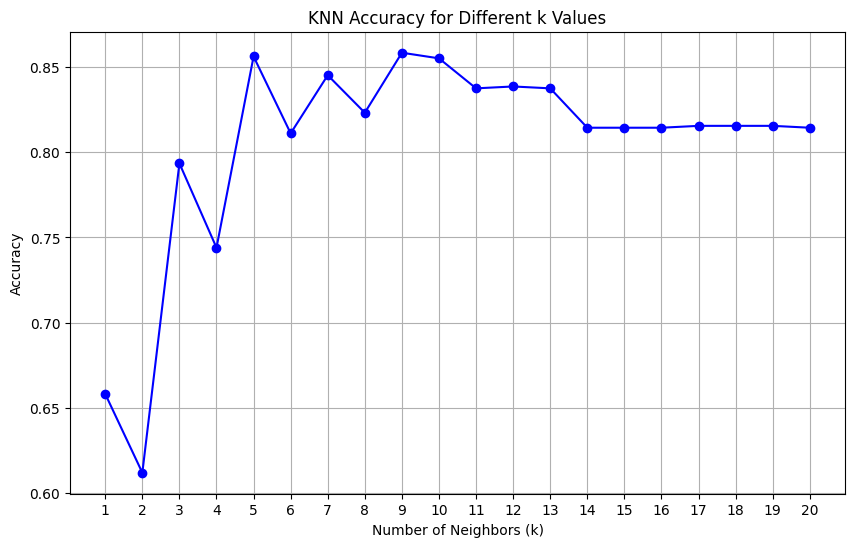

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure datetime index for the data
resampled_data.index = pd.to_datetime(resampled_data.index)

# Splitting the data into train and test sets
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (except the target column)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Test different values of k
best_k = None
best_accuracy = 0
results = []

for k in range(1, 21):  # Testing k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results.append((k, accuracy))

    # Update the best k if this one is better
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    print(f"Results for k={k}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=encoder.classes_)}")
    print("-" * 50)

# Display the best k
print(f"The best k is {best_k} with an accuracy of {best_accuracy:.4f}")

# Plotting the results
import matplotlib.pyplot as plt

k_values = [result[0] for result in results]
accuracies = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()


## XGBoost

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=50, learning_rate=0.01:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=50, learning_rate=0.05:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=50, learning_rate=0.1:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=50, learning_rate=0.2:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=100, learning_rate=0.01:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=100, learning_rate=0.05:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=100, learning_rate=0.1:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=100, learning_rate=0.2:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=150, learning_rate=0.01:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=150, learning_rate=0.05:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=150, learning_rate=0.1:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=150, learning_rate=0.2:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:24:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=200, learning_rate=0.01:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:24:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=200, learning_rate=0.05:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=200, learning_rate=0.1:
Accuracy: 0.9989
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.99      1.00       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      1.00      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:24:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for n_estimators=200, learning_rate=0.2:
Accuracy: 0.9967
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00        47
           C       1.00      1.00      1.00       732
           D       1.00      0.97      0.99       105
           E       0.96      1.00      0.98        23

    accuracy                           1.00       910
   macro avg       0.99      0.99      0.99       910
weighted avg       1.00      1.00      1.00       910

--------------------------------------------------
The best configuration is n_estimators=50, learning_rate=0.01 with an accuracy of 0.9989


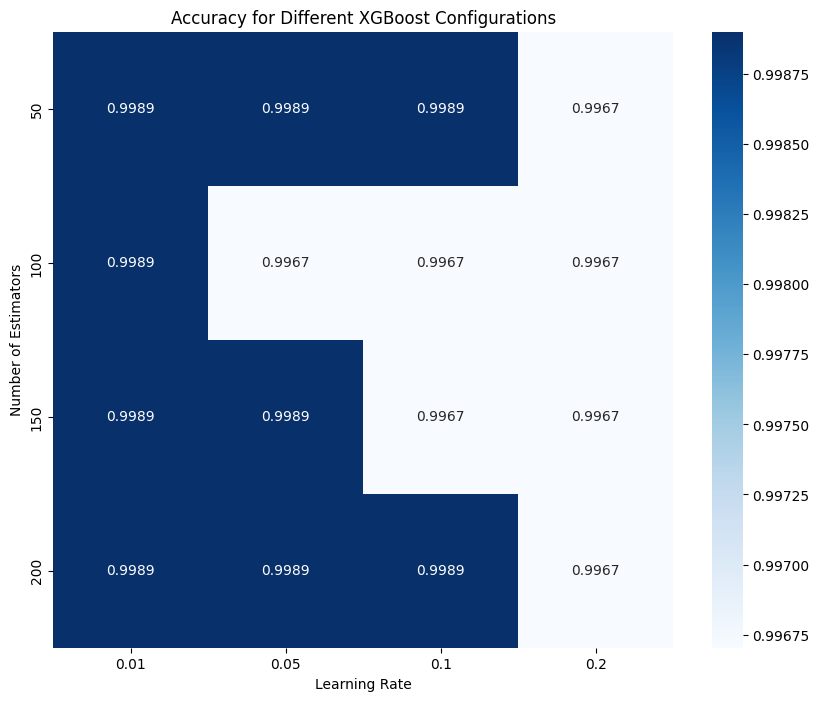

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Ensure datetime index for the data
resampled_data.index = pd.to_datetime(resampled_data.index)

# Splitting the data into train and test sets
train_data = resampled_data[resampled_data.index < '2024-11-01']
test_data = resampled_data[resampled_data.index >= '2024-11-01']

# Normalize features (optional for tree-based models like XGBoost)
scaler = MinMaxScaler()
X_train = train_data.drop(columns=['Target']).values
X_test = test_data.drop(columns=['Target']).values

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(train_data['Target'])
y_test = encoder.transform(test_data['Target'])

# Hyperparameter tuning: Number of estimators and learning rate
best_accuracy = 0
best_params = {}
results = []

for n_estimators in [50, 100, 150, 200]:  # Number of trees
    for learning_rate in [0.01, 0.05, 0.1, 0.2]:  # Learning rates
        # Initialize and train the model
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, use_label_encoder=False, eval_metric='mlogloss')
        model.fit(X_train_scaled, y_train)

        # Make predictions and evaluate
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((n_estimators, learning_rate, accuracy))

        # Update the best parameters if the current configuration is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

        print(f"Results for n_estimators={n_estimators}, learning_rate={learning_rate}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred, target_names=encoder.classes_)}")
        print("-" * 50)

# Display the best configuration
print(f"The best configuration is n_estimators={best_params['n_estimators']}, learning_rate={best_params['learning_rate']} with an accuracy of {best_accuracy:.4f}")

# Visualization: Heatmap of results
import seaborn as sns

# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(results, columns=['n_estimators', 'learning_rate', 'accuracy'])
results_pivot = results_df.pivot(index='n_estimators', columns='learning_rate', values='accuracy')

plt.figure(figsize=(10, 8))
sns.heatmap(results_pivot, annot=True, fmt=".4f", cmap="Blues", cbar=True)
plt.title('Accuracy for Different XGBoost Configurations')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()
